# Job Placement Prediction Using KNN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, f1_score

In [2]:
dataset = pd.read_csv('Job_Placement_Data.csv')


# Exploratory Data Analysis

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [4]:
dataset.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

In [5]:
dataset.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [6]:
#cheak the number of unique value
dataset.select_dtypes(include="float").nunique()

ssc_percentage         103
hsc_percentage          97
degree_percentage       89
emp_test_percentage    100
mba_percent            205
dtype: int64

# Working with Catagorical Variable:

In [7]:
cat_var = ['gender', 'ssc_board', 'hsc_board',
       'hsc_subject', 'undergrad_degree',
       'work_experience', 'specialisation'
       ]

In [8]:
cat_var

['gender',
 'ssc_board',
 'hsc_board',
 'hsc_subject',
 'undergrad_degree',
 'work_experience',
 'specialisation']

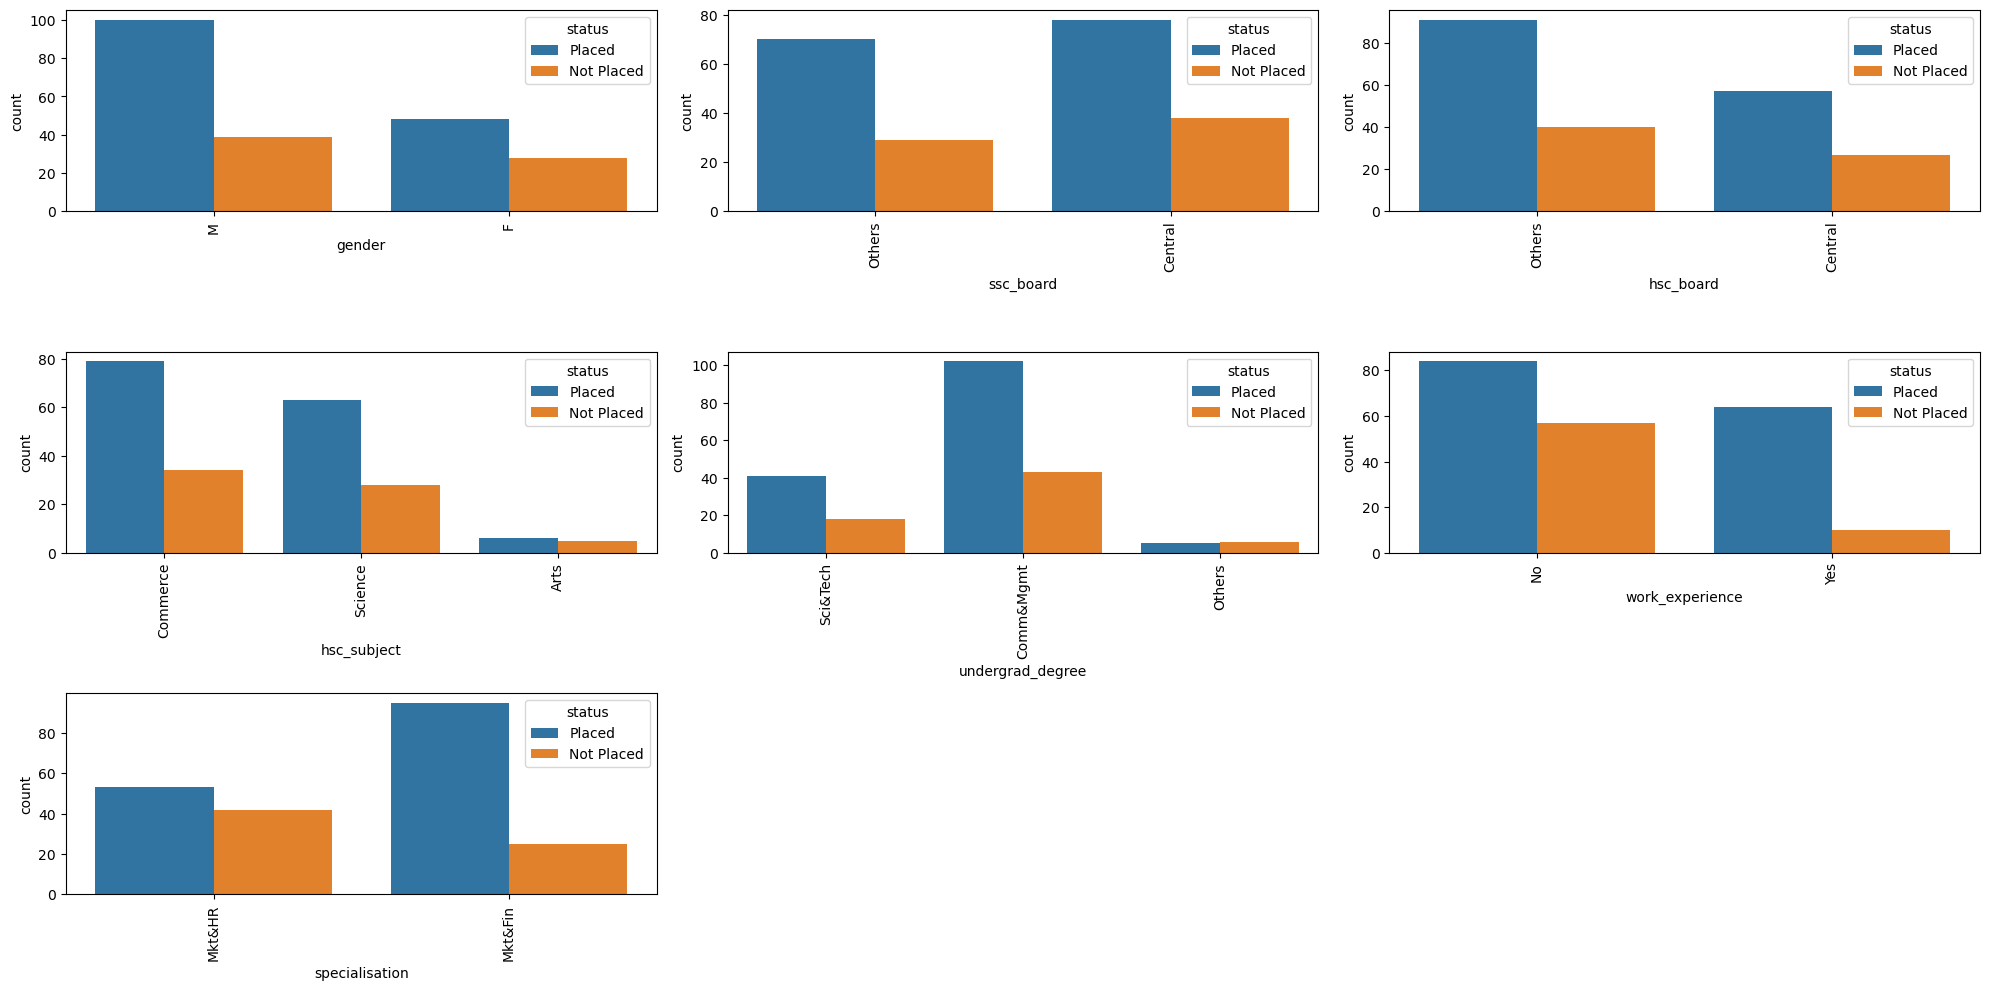

In [9]:
num_cat_vars = len(cat_var)
num_cols = 3  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

# Creating Fig with subplot
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))
axs = axs.flatten()

# Creating countplot for each categorical variable
for i, var in enumerate(cat_var):
    sns.countplot(x=var, data=dataset, hue = 'status', ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove the empty subplot in the last position
# Remove the empty subplot in the last position
if len(axs) > num_cat_vars:
    fig.delaxes(axs[-1])
    fig.delaxes(axs[-2])
# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


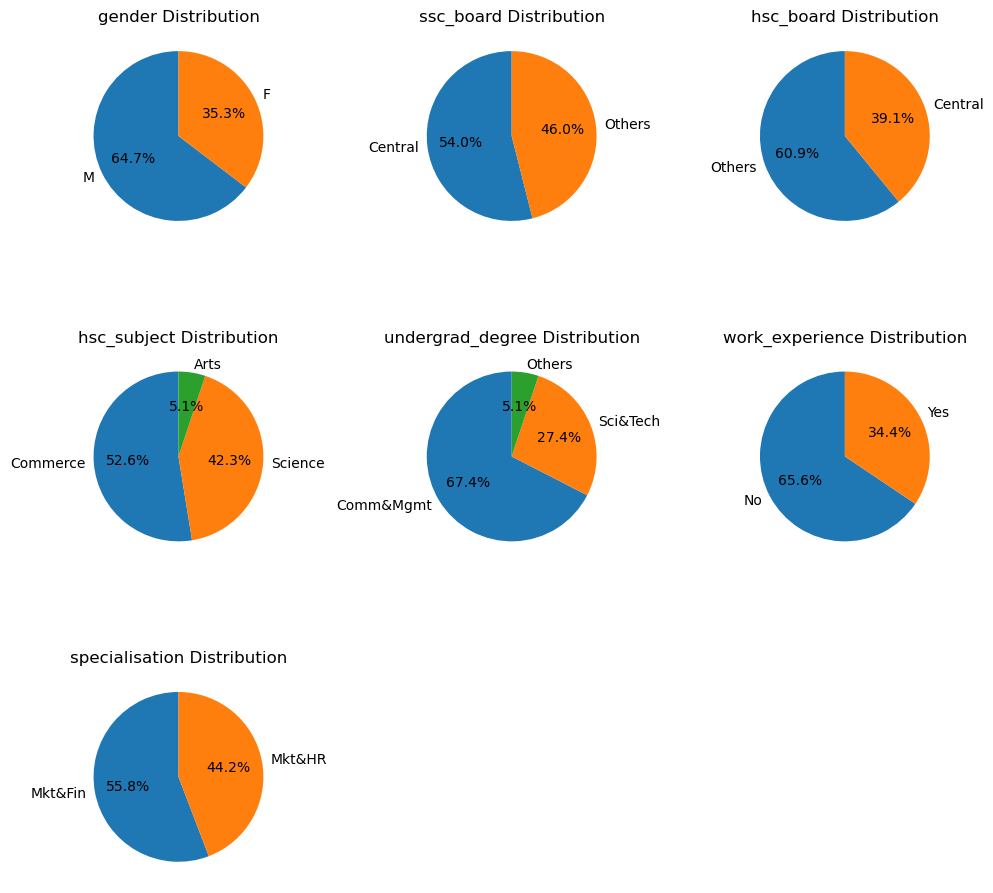

In [10]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(cat_var)
num_cols = 3  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through categorical variables and create countplots
for i, var in enumerate(cat_var):
    if i < len(axs):
        ax = axs[i]
        cat_counts = dataset[var].value_counts()
        ax.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'{var} Distribution')
    
# Adjust spacing between subplots
fig.tight_layout()

# If there's an extra subplot that needs to be removed
if len(axs) > num_cat_vars:
    fig.delaxes(axs[-1])
    fig.delaxes(axs[-2])

# Show the plot
plt.show()

# Numarical Variable EDA

In [11]:
num_vars = ['ssc_percentage', 'hsc_percentage', 'degree_percentage', 'emp_test_percentage', 'mba_percent' ]

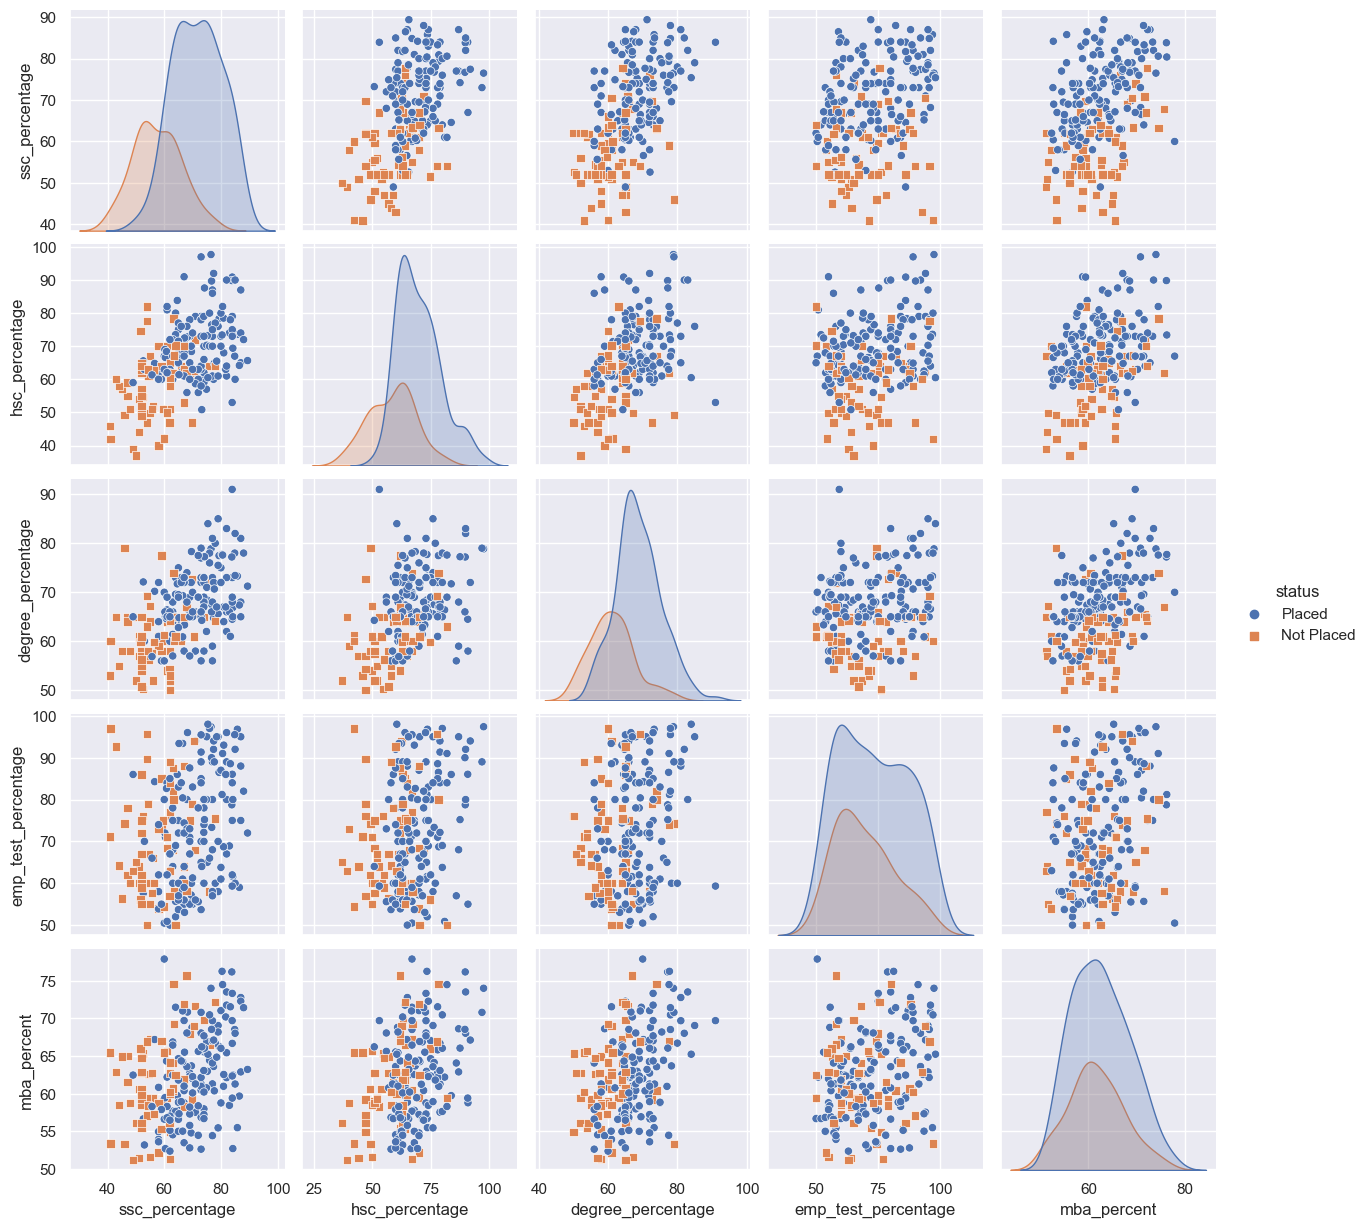

In [12]:
#Improve visual 
sns.set()
# Display pair plot to visualize relationships between features
sns.pairplot(dataset, hue='status', markers=["o", "s"])

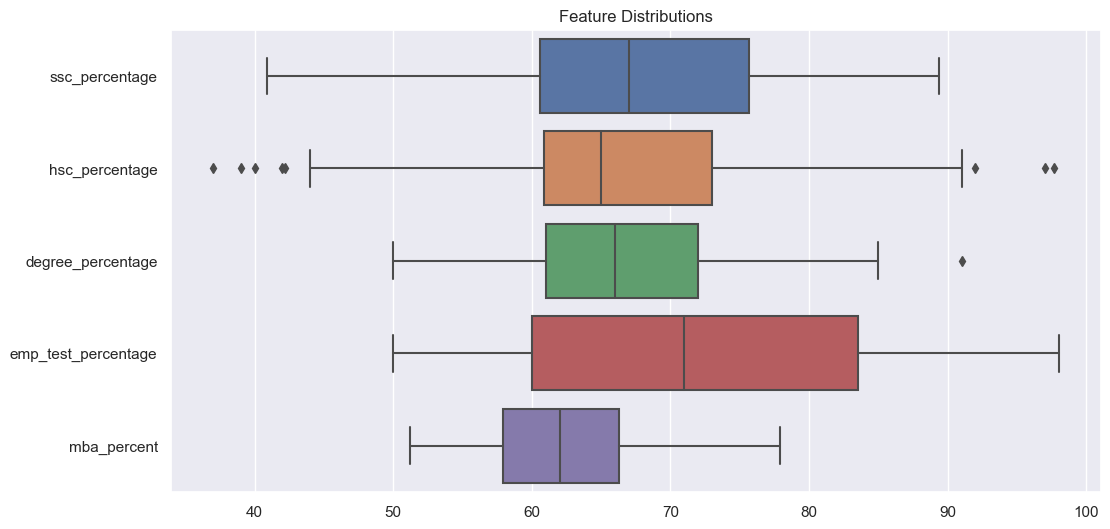

In [13]:
# Display box plots to visualize feature distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, orient='h')
plt.title("Feature Distributions")
plt.show()

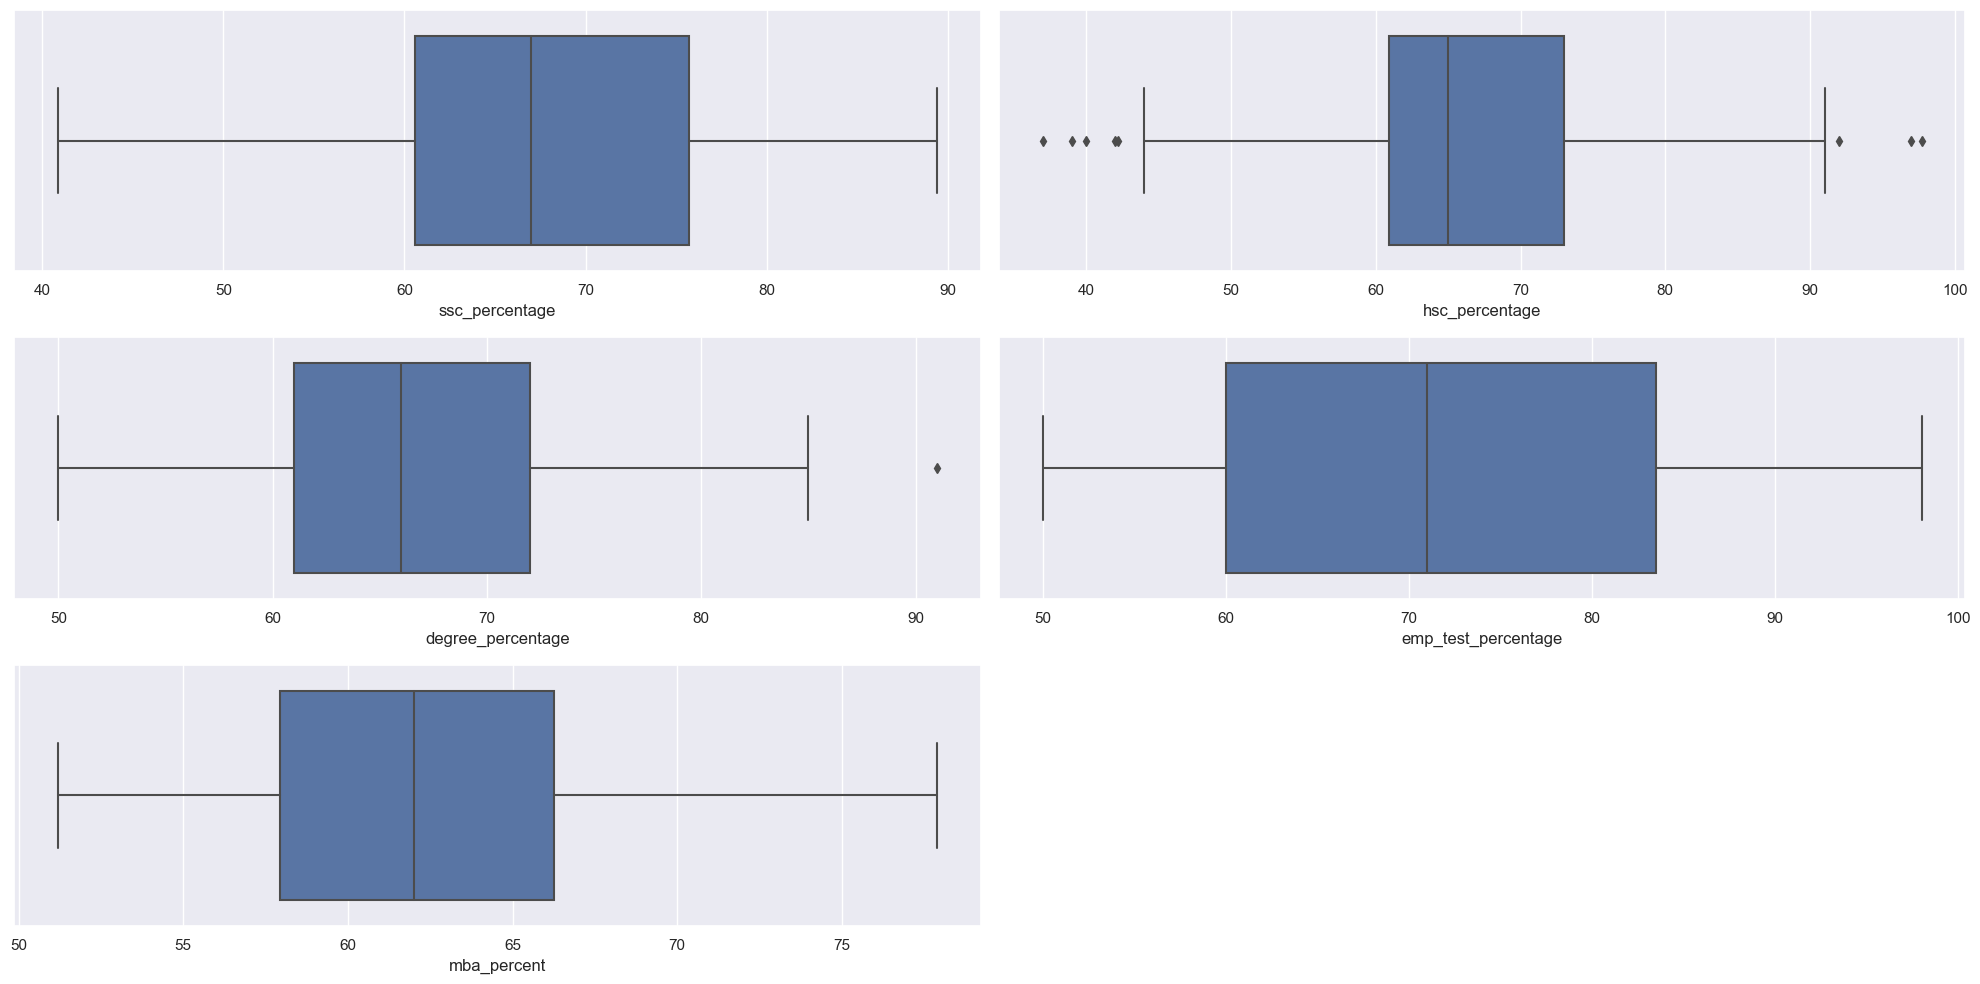

In [14]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(num_vars)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var,data=dataset, ax=axs[i])
    
fig.delaxes(axs[-1])
# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

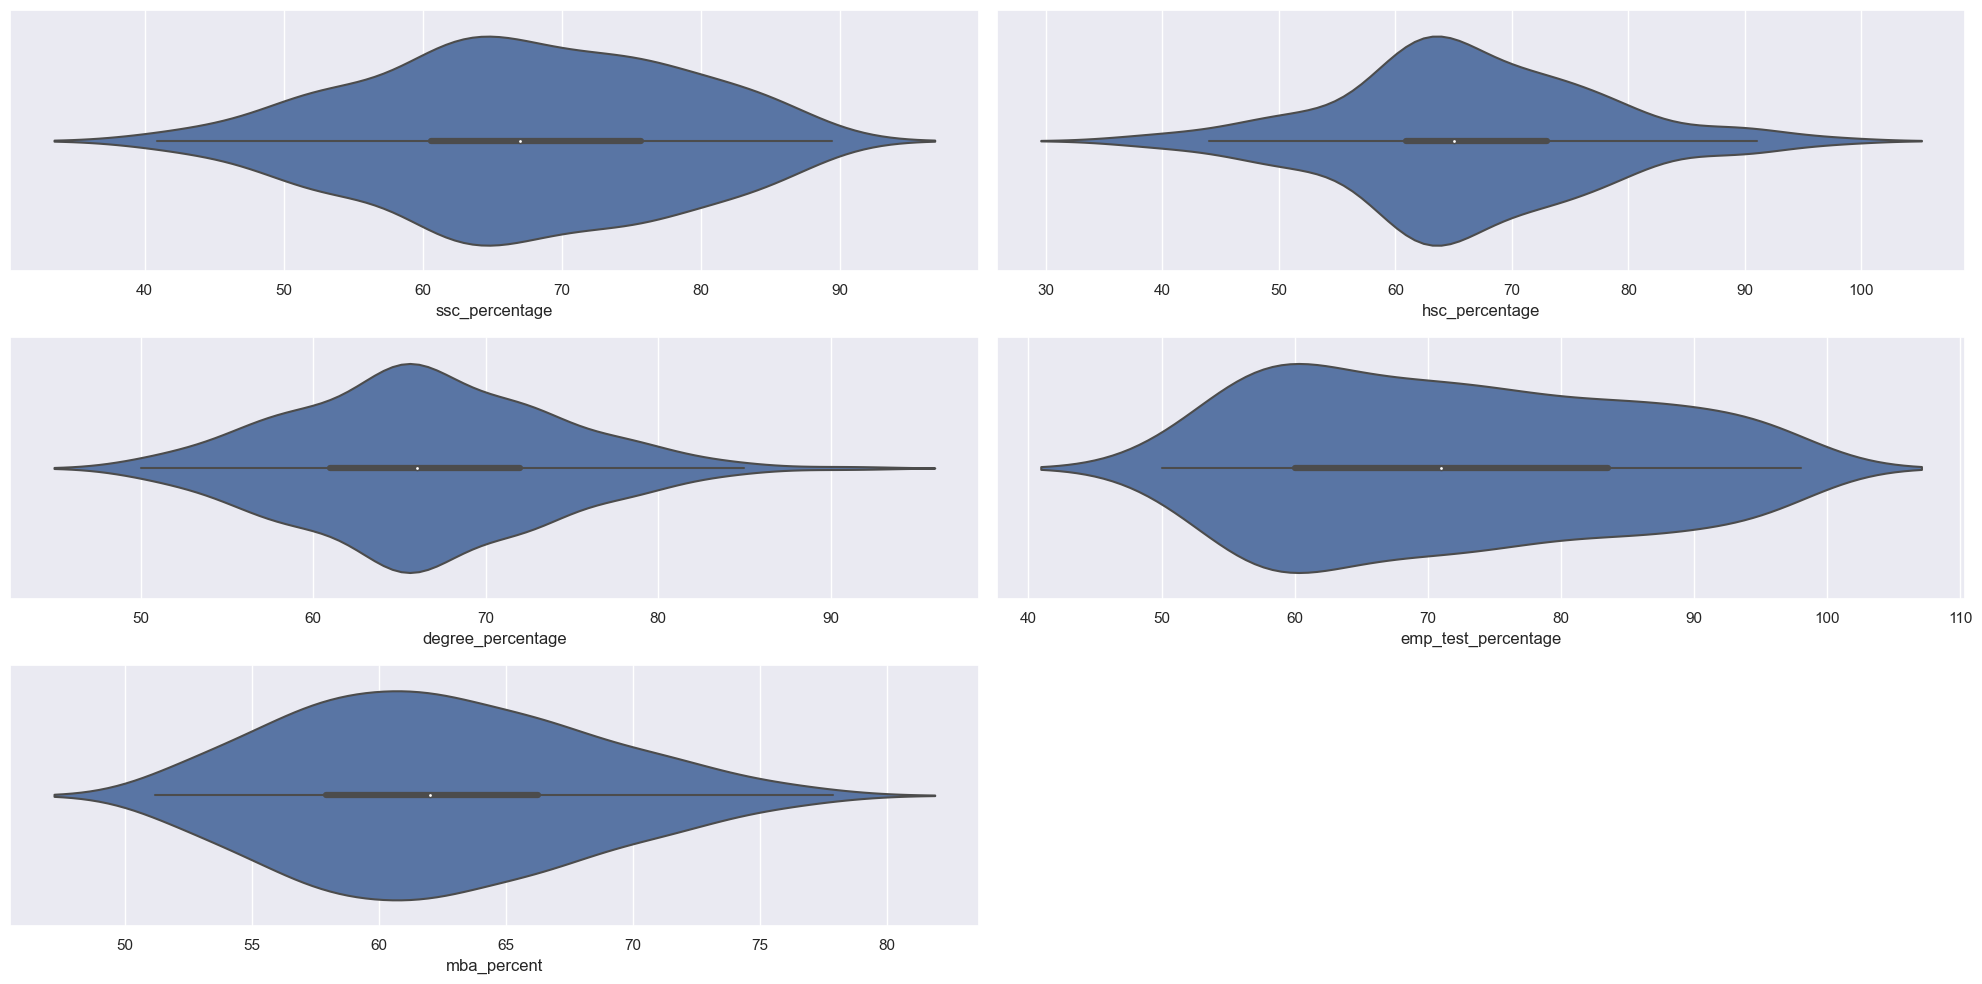

In [15]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(num_vars)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var,data=dataset, ax=axs[i])
    
fig.delaxes(axs[-1])
# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

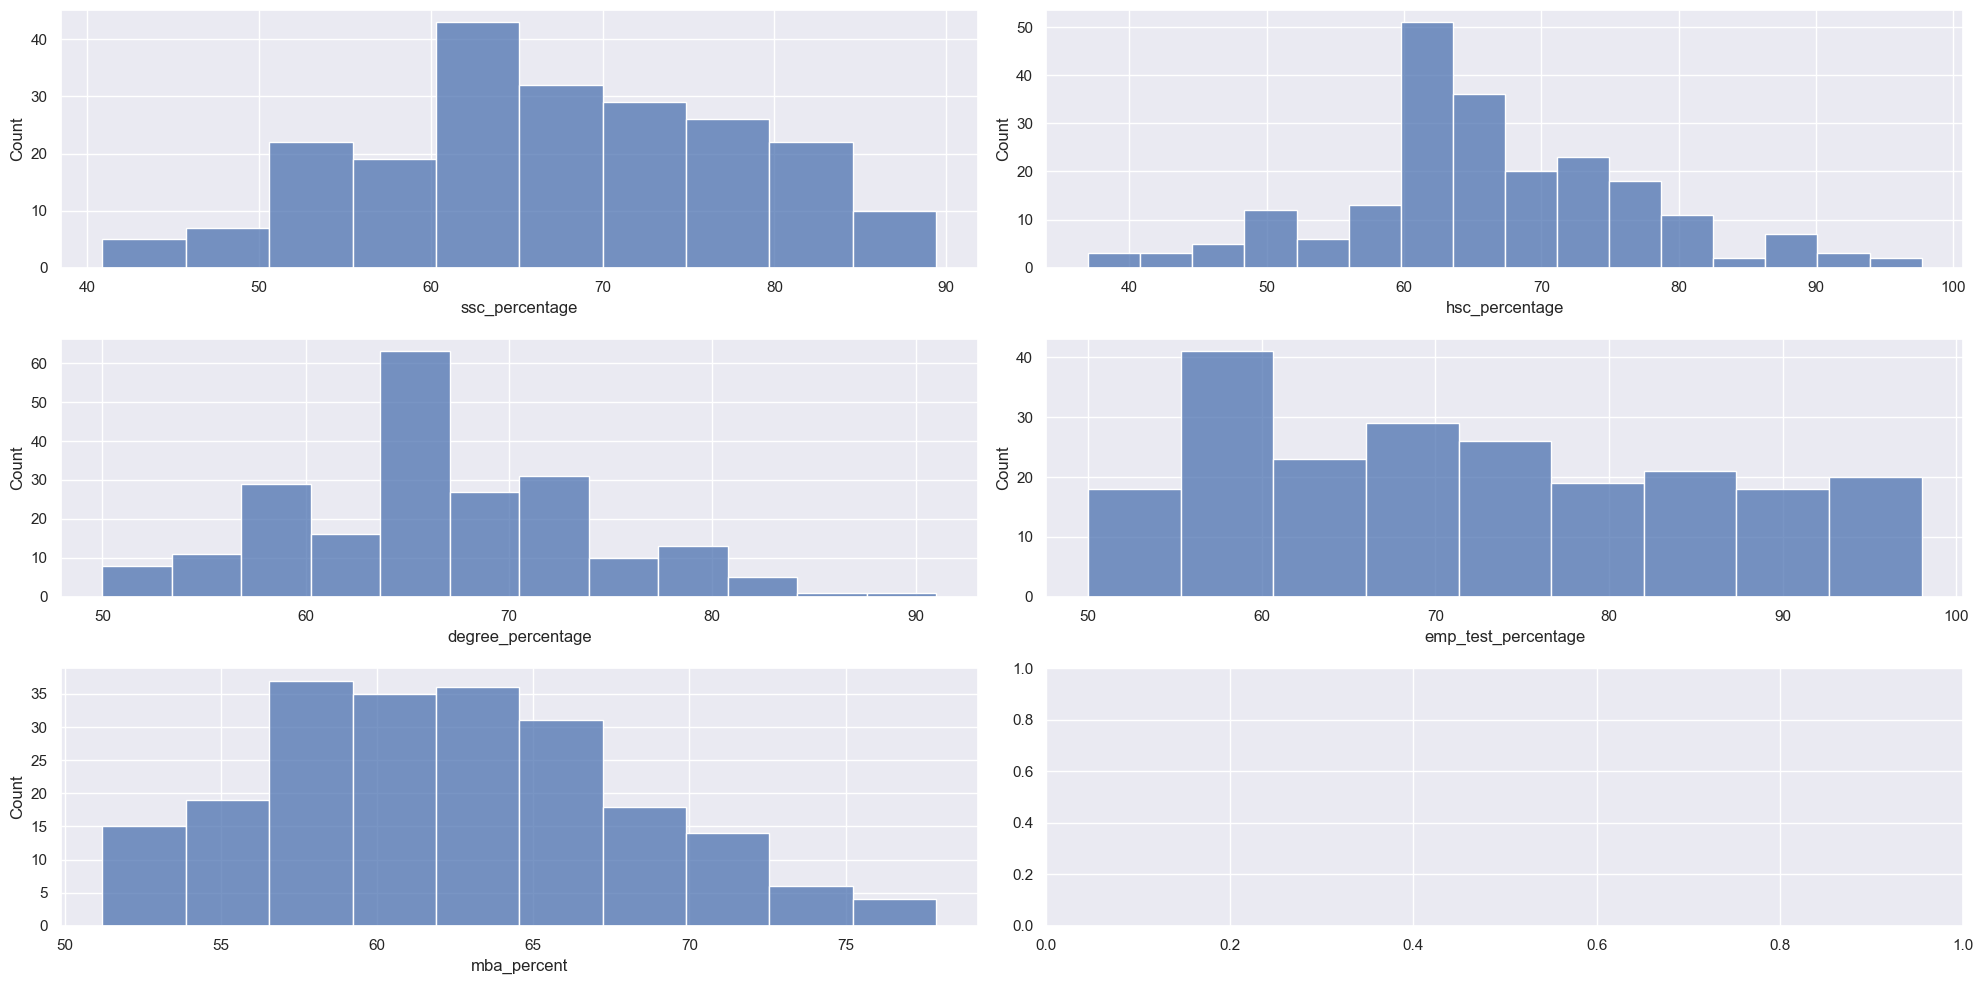

In [16]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(num_vars)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var,data=dataset, ax=axs[i])
    
# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16904\1304408252.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', linewidths=.5)


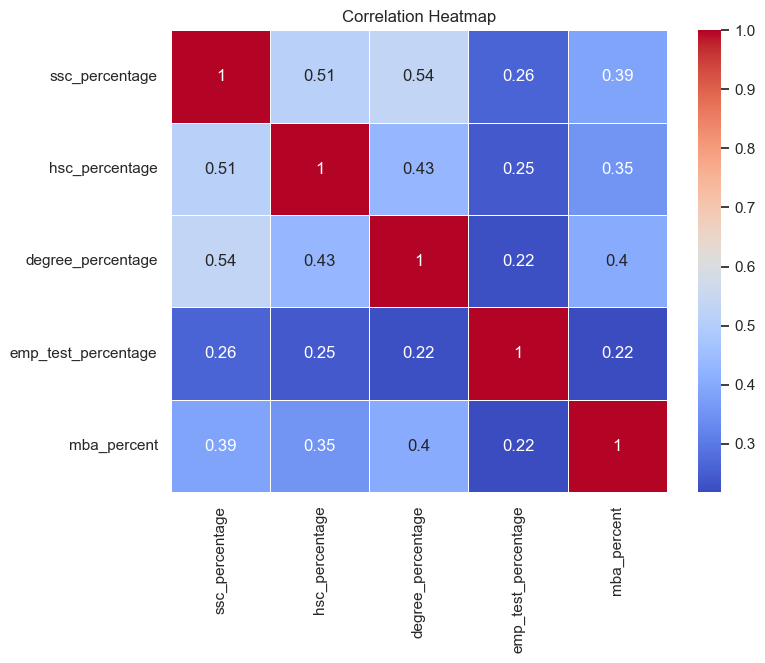

In [17]:
# Display correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

# Working with null values

<Axes: >

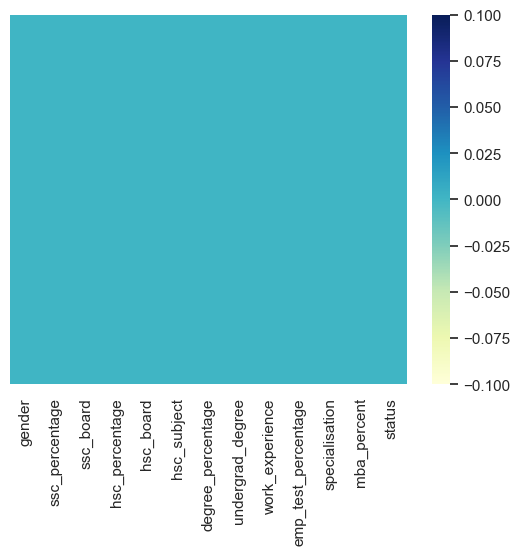

In [18]:
sns.heatmap(dataset.isnull() ,yticklabels=False , cmap="YlGnBu")

In [19]:
dataset.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [20]:
dataset

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


# Label Encoding:

In [21]:
le = LabelEncoder()
dataset['status']=le.fit_transform(dataset['status'])

In [22]:
y = dataset[['status']]

# Dummy Variable:
Creating Dummy Variable from catagorical variable

In [23]:
gender = pd.get_dummies(dataset[['gender']],drop_first=True)
ssc_board = pd.get_dummies(dataset[['ssc_board']],drop_first=True)
hsc_board = pd.get_dummies(dataset[['hsc_board']],drop_first=True)
hsc_subject = pd.get_dummies(dataset[['hsc_subject']],drop_first=True)
undergrad_degree = pd.get_dummies(dataset[['undergrad_degree']],drop_first=True)
work_experience = pd.get_dummies(dataset[['work_experience']],drop_first=True)
specialisation = pd.get_dummies(dataset[['specialisation']],drop_first=True)

In [24]:
#Drop the previous catagorical variable
cat_var = ['gender', 'ssc_board', 'hsc_board',
           'hsc_subject', 'undergrad_degree',
           'work_experience', 'specialisation',
            'status'
]
for var in cat_var: 
    dataset.drop(columns=var,inplace=True)

In [25]:
dataset.head()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
0,67.00,91.00,58.00,55.0,58.80
1,79.33,78.33,77.48,86.5,66.28
2,65.00,68.00,64.00,75.0,57.80
3,56.00,52.00,52.00,66.0,59.43
4,85.80,73.60,73.30,96.8,55.50


In [26]:
#concat dummy variable to the original dataset
dataset = pd.concat([
    dataset, 
    gender,
    ssc_board,
    hsc_board,
    hsc_subject,
    undergrad_degree,
    work_experience,
    specialisation,
], axis=1)

In [27]:
dataset.head()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1,0,1
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,0,0


# Feature Selection

In [28]:
y.head()

,status
0,1
1,1
2,1
3,0
4,1


In [29]:
x = dataset

In [30]:
x.head()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1,0,1
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,0,0


<Axes: >

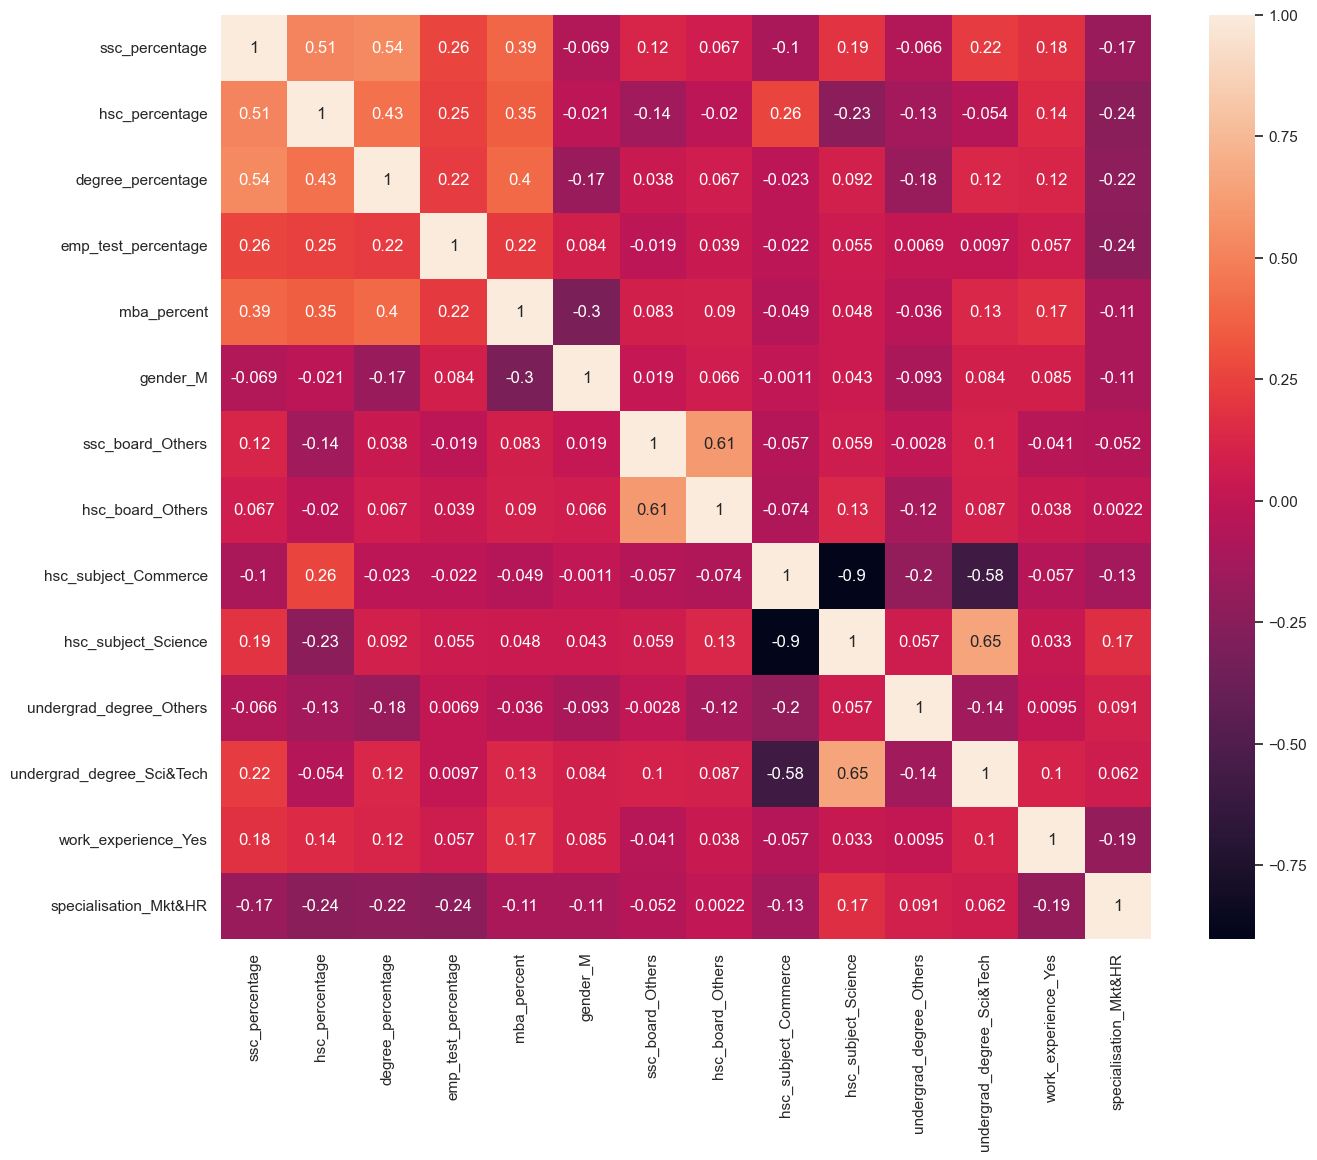

In [31]:
plt.figure(figsize=(15,12))
sns.heatmap(dataset.corr(),fmt='.2g',annot=True)

# Train and Test Split

In [32]:
x_train,x_test,y_train,y_test=train_test_split( x, y, test_size=0.20, random_state=4)

# Training Model

In [33]:
model = KNeighborsClassifier(5)

In [34]:
model.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [35]:
y_pred = model.predict(x_test)

In [36]:
confusion_matrix(y_test,y_pred)

array([[10,  5],
       [ 1, 27]], dtype=int64)

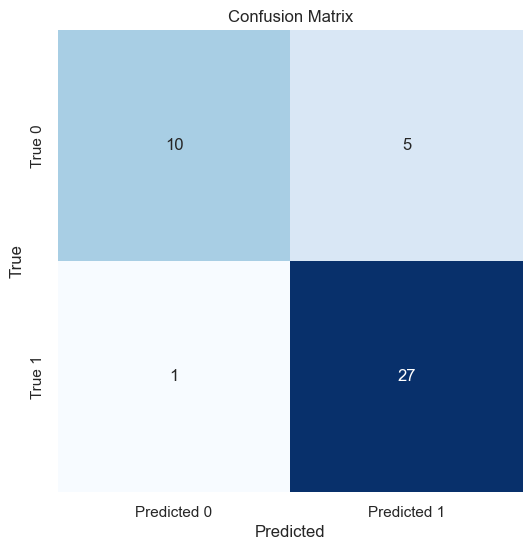

In [37]:
import numpy as np

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [38]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8604651162790697


In [39]:
# Calculate precision score
precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)

Precision Score: 0.84375


In [40]:
# Calculate recall score
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)

Recall Score: 0.9642857142857143


In [41]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

F1 Score: 0.8999999999999999
